피처 설명

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
data.info() # 널값이 없다 ㅎㅎ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [18]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x2982a4326c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2982a443cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2982a443408>],
 'medians': [<matplotlib.lines.Line2D at 0x2982a448c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2982a448d48>],
 'means': []}

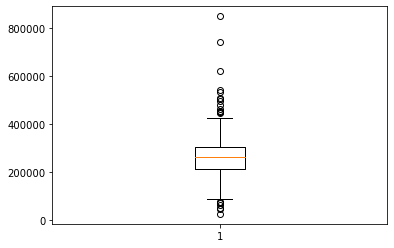

In [19]:
# platelets 75값이랑 최대값 차이가 너무 난다. ejection_fraction과 serum_creatinine 또한

plt.boxplot(data['platelets'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2982a4abc48>,
 'caps': [<matplotlib.lines.Line2D at 0x2982a4b0a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2982a4ab408>],
 'medians': [<matplotlib.lines.Line2D at 0x2982a4b58c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2982a4b5fc8>],
 'means': []}

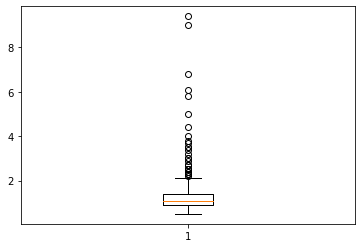

In [20]:
plt.boxplot(data['serum_creatinine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2982a50cf08>,
 'caps': [<matplotlib.lines.Line2D at 0x2982a513dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2982a50cd48>],
 'medians': [<matplotlib.lines.Line2D at 0x2982a516c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2982a51c948>],
 'means': []}

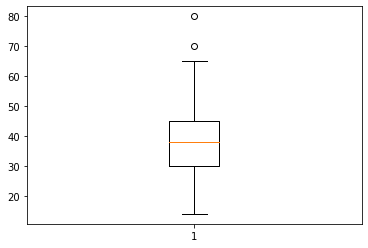

In [21]:
plt.boxplot(data['ejection_fraction'])

In [22]:
for column in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT'] :
    print('\n column name : ', column)
    print(data[column].value_counts())
    # 모두 불균형


 column name :  anaemia
0    170
1    129
Name: anaemia, dtype: int64

 column name :  diabetes
0    174
1    125
Name: diabetes, dtype: int64

 column name :  high_blood_pressure
0    194
1    105
Name: high_blood_pressure, dtype: int64

 column name :  smoking
0    203
1     96
Name: smoking, dtype: int64

 column name :  DEATH_EVENT
0    203
1     96
Name: DEATH_EVENT, dtype: int64


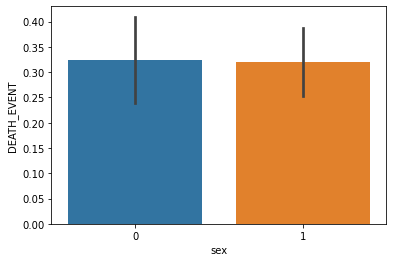

In [24]:
sns.barplot(x='sex', y='DEATH_EVENT', data=data)

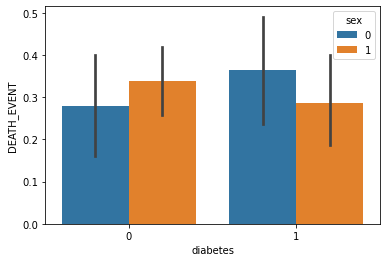

In [25]:
sns.barplot(x='diabetes', y='DEATH_EVENT', hue='sex', data=data)